# 자유자재로 데이터 가공하기

## 6-1. 데이터 전처리-원하는 형태로 데이터 가공하기

### 데이터 전처리 - dplyr 패키지

- filter() 행 추출 
- select() 열(변수) 추출 
- arrange() 정렬 
- mutate() 변수 추가 
- summarise() 통계치 산출 
- group_by() 집단별로 나누기 
- left_join() 데이터 합치기(열) 
- bind_rows() 데이터 합치기(행) 

## 6-2. 조건에 맞는 데이터만 추출하기 

### dplyr 패키지 로드 & 데이터 준비 

In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
exam<-read.csv("./Rdata/csv_exam.csv")
exam

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15
10,3,50,98,45


In [4]:
# exam에서 class가 1인 경우만 추출하여 출력
exam %>% filter(class == 1)

# [참고] 단축키 [Ctrl+Shit+M]으로 %>% 기호 입력

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58


In [5]:
# 2 반인 경우만 추출
 exam %>% filter(class == 2) 

id,class,math,english,science
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25


In [7]:
# 1 반이 아닌 경우
exam %>% filter(class != 1)

id,class,math,english,science
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65
12,3,45,85,32
13,4,46,98,65
14,4,48,87,12


In [9]:
# 3 반이 아닌 경우
exam  %>%  filter(class != 3)

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
13,4,46,98,65
14,4,48,87,12


### 초과,미만,이상,이하 조건 걸기

In [10]:
# 수학 점수가 50 점을 초과한 경우
exam  %>% filter(math > 50)

id,class,math,english,science
2,1,60,97,60
7,2,80,90,45
8,2,90,78,25
11,3,65,65,65
15,4,75,56,78
16,4,58,98,65
17,5,65,68,98
18,5,80,78,90
19,5,89,68,87
20,5,78,83,58


In [11]:
# 수학 점수가 50 점 미만인 경우
exam  %>% filter(math < 50)

id,class,math,english,science
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
9,3,20,98,15
12,3,45,85,32
13,4,46,98,65
14,4,48,87,12


In [12]:
# 영어점수가 80 점 이상인 경우
exam  %>% filter(english >= 80)

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
9,3,20,98,15
10,3,50,98,45
12,3,45,85,32


In [13]:
# 영어점수가 80 점 이하인 경우
exam  %>% filter(english <= 80)

id,class,math,english,science
5,2,25,80,65
8,2,90,78,25
11,3,65,65,65
15,4,75,56,78
17,5,65,68,98
18,5,80,78,90
19,5,89,68,87


### 여러 조건을 충족하는 행 추출하기

In [15]:
# 1 반 이면서 수학 점수가 50 점 이상인 경우
exam %>% filter(class == 1 & math >= 50)

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60


In [16]:
# 2 반 이면서 영어점수가 80 점 이상인 경우
exam %>% filter(class==2 & english >= 80)

id,class,math,english,science
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45


### 여러 조건 중 하나 이상 충족하는 행 추출하기

In [17]:
# 수학 점수가 90 점 이상이거나 영어점수가 90 점 이상인 경우
exam %>% filter(math>=90 | english>=90)

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
4,1,30,98,58
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15
10,3,50,98,45
13,4,46,98,65
16,4,58,98,65


In [18]:
# 영어점수가 90 점 미만이거나 과학점수가 50 점 미만인 경우
exam %>% filter(english<90 | science<50)

id,class,math,english,science
3,1,45,86,78
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65
12,3,45,85,32
14,4,48,87,12


### 목록에 해당되는 행 추출하기 

In [49]:
exam %>% filter(class==1|class==3|class==5) #1,3,5반이면 출력

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65
12,3,45,85,32
17,5,65,68,98
18,5,80,78,90


### %in% 이용

In [50]:
exam %>% filter(class %in% c(1,3,5))

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65
12,3,45,85,32
17,5,65,68,98
18,5,80,78,90


### 추출한 행으로 데이터 만들기 

In [51]:
class1<-exam %>% filter(class ==1)

In [52]:
class2<-exam %>% filter(class ==2)

In [53]:
mean(class1$math)

[1] 46.25

In [54]:
mean(class2$math)

[1] 61.25

### R에서 사용하는 기호들 
- %in% 매칭 확인 
- %/% 나눗셈의 몫 
- %% 나눗셈의 나머지

## 혼자서 해보기

mpg 데이터를 이용해 분석 문제를 해결해 보세요. 
- Q1. 자동차 배기량에 따라 고속도로 연비가 다른지 알아보려고 합니다. displ(배기량)이 4 이하인 자동차와 5 이상인 자동차 중 어떤 자동차의 hwy(고속도로 연비)가 평균적으로 더 높은지 알아보세요. 
- Q2. 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 합니다. "audi"와 "toyota" 중 어느 manufacturer(자동차 제조 회사)의 cty(도시 연비)가 평균적으로 더 높은지 알아보세요. 
- Q3. "chevrolet", "ford", "honda" 자동차의 고속도로 연비 평균을 알아보려고 합니다. 이 회사들의 자동차를 추출한 뒤 hwy 전체 평균을 구해보세요. 

Q1. 자동차 배기량에 따라 고속도로 연비가 다른지 알아보려고 합니다. displ(배기량)이 4 이하인 자동차와 5 이상인 자동차 중 어떤 자동차의 hwy(고속도로 연비)가 평균적으로 더 높은지 알아보세요

In [25]:
mpg<-as.data.frame(ggplot2::mpg)

mpg_a<-mpg %>% filter(displ <= 4) #displ(배기량)이 4 이하인 자동차
mpg_b<-mpg %>% filter(displ >= 5) #5 이상인 자동차

In [28]:
mean(mpg_a$hwy) # displ 4이하인 자동차 고속도로 연비

[1] 25.96319

In [29]:
mean(mpg_b$hwy) # displ 5이상 자동차 고속도로 연비

[1] 18.07895

Q2. 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 합니다. "audi"와 "toyota" 중 어느 manufacturer(자동차 제조 회사)의 cty(도시 연비)가 평균적으로 더 높은지 알아보세요.  

-> 비교할 때는 데이터를 2개로 꺼내야 한다

In [36]:
audi<-mpg %>% filter(manufacturer=="audi")
head(audi)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [37]:
toyota<-mpg %>% filter(manufacturer=='toyota')
head(toyota)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv


In [39]:
mean(audi$cty)

[1] 17.61111

In [40]:
mean(toyota$cty)

[1] 18.52941

Q3. "chevrolet", "ford", "honda" 자동차의 고속도로 연비 평균을 알아보려고 합니다. 이 회사들의 자동차를 추출한 뒤 hwy 전체 평균을 구해보세요.

-> 한 개의 점수를 낼 때는 %in% 사용

In [48]:
mpg_new<-mpg %>% filter(manufacturer %in% c('chevrolet','honda','ford'))
mean(mpg_new$hwy)

[1] 22.50943

## 6-3. 필요한 변수만 추출하기

In [55]:
exam %>% select(math)

math
50
60
45
30
25
50
80
90
20
50


In [56]:
exam %>% select(english)

english
98
97
86
98
80
89
90
78
98
98


### 여러 변수 추출하기 

In [59]:
exam %>% select(class,math,english)

class,math,english
1,50,98
1,60,97
1,45,86
1,30,98
2,25,80
2,50,89
2,80,90
2,90,78
3,20,98
3,50,98


### 변수 제외하기 

In [60]:
exam %>% select(-math)

id,class,english,science
1,1,98,50
2,1,97,60
3,1,86,78
4,1,98,58
5,2,80,65
6,2,89,98
7,2,90,45
8,2,78,25
9,3,98,15
10,3,98,45


In [61]:
exam %>% select(-math,-english)

id,class,science
1,1,50
2,1,60
3,1,78
4,1,58
5,2,65
6,2,98
7,2,45
8,2,25
9,3,15
10,3,45


### dplyr 함수 조합하기 

In [63]:
# class 가 1 인 행만 추출한 다음 english 추출
exam %>% filter(class==1) %>% select(english)

english
98
97
86
98


### 가독성 있게 줄 바꾸기 

In [64]:
exam %>% 
    filter(class == 1) %>% 
    select(english)

english
98
97
86
98


### 일부만 출력하기 

In [66]:
exam %>% select(id,math) %>% 
head(10)

id,math
1,50
2,60
3,45
4,30
5,25
6,50
7,80
8,90
9,20
10,50


## 혼자서 해보기

mpg 데이터를 이용해서 분석 문제를 해결해보세요. 
- Q1. mpg 데이터는 11 개 변수로 구성되어 있습니다. 이 중 일부만 추출해서 분석에 활용하려고 합니다. mpg 데이터에서 class(자동차 종류), cty(도시 연비) 변수를 추출해 새로운 데이터를 만드세요. 새로 만든 데이터의 일부를 출력해서 두 변수로만 구성되어 있는지 확인하세요. 
- Q2. 자동차 종류에 따라 도시 연비가 다른지 알아보려고 합니다. 앞에서 추출한 데이터를 이용해서 class(자동차 종류)가 "suv"인 자동차와 "compact"인 자동차 중 어떤 자동차의 cty(도시 연비)가 더 높은지 알아보세요. 

In [72]:
# Q1
mpg_cc<-mpg %>% select(class,cty) 
head(mpg_cc)

class,cty
compact,18
compact,21
compact,20
compact,21
compact,16
compact,18


In [83]:
# Q2
mpg_suv<-mpg %>% filter(class == "suv")
mpg_com<-mpg %>% filter(class == "compact")

In [85]:
mean(mpg_suv$cty)

[1] 13.5

In [86]:
mean(mpg_com$cty)

[1] 20.12766

## 6-4. 순서대로 정렬하기 

### 오름차순으로 정렬하기 

In [87]:
exam %>% arrange(math) # math오름차순 정렬

id,class,math,english,science
9,3,20,98,15
5,2,25,80,65
4,1,30,98,58
3,1,45,86,78
12,3,45,85,32
13,4,46,98,65
14,4,48,87,12
1,1,50,98,50
6,2,50,89,98
10,3,50,98,45


### 내림차순으로 정렬하기

In [89]:
exam %>% arrange(desc(math)) #math내림차순으로

id,class,math,english,science
8,2,90,78,25
19,5,89,68,87
7,2,80,90,45
18,5,80,78,90
20,5,78,83,58
15,4,75,56,78
11,3,65,65,65
17,5,65,68,98
2,1,60,97,60
16,4,58,98,65


#### 정렬 기준 변수 여러개 지정 

In [90]:
exam %>% arrange(class,math)

id,class,math,english,science
4,1,30,98,58
3,1,45,86,78
1,1,50,98,50
2,1,60,97,60
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15
12,3,45,85,32


### 혼자서 해보기 
mpg 데이터를 이용해서 분석 문제를 해결해보세요. 
- "audi"에서 생산한 자동차 중에 어떤 자동차 모델의 hwy(고속도로 연비)가 높은지 알아보려고 합니다. "audi"에서 생산한 자동차 중 hwy가 1~5위에 해당하는 자동차의 데이터를 출력하세요. 

In [106]:
mpg_audi<-mpg %>% filter(manufacturer=="audi")
mpg_audi %>% arrange(desc(hwy)) %>% head(5)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


## 6-5. 파생변수 추가하기 

In [107]:
exam %>% 
    mutate(total = math +english + science) %>% 
    head

id,class,math,english,science,total
1,1,50,98,50,198
2,1,60,97,60,217
3,1,45,86,78,209
4,1,30,98,58,186
5,2,25,80,65,170
6,2,50,89,98,237


### 여러 파생변수 한 번에 추가하기

In [109]:
exam %>% 
    mutate(total = math +english + science,
    mean = (math + english + science)/3) %>% 
    head

id,class,math,english,science,total,mean
1,1,50,98,50,198,66.00000
2,1,60,97,60,217,72.33333
3,1,45,86,78,209,69.66667
4,1,30,98,58,186,62.00000
5,2,25,80,65,170,56.66667
6,2,50,89,98,237,79.00000


### mutate()에 ifelse() 적용하기

In [111]:
exam %>% 
    mutate(test = ifelse(science>=60,"pass","fail")) %>% 
    head

id,class,math,english,science,test
1,1,50,98,50,fail
2,1,60,97,60,pass
3,1,45,86,78,pass
4,1,30,98,58,fail
5,2,25,80,65,pass
6,2,50,89,98,pass


### 추가한 변수를 dplyr 코드에 바로 활용하기 

In [113]:
exam %>% 
    mutate(total= math + english + science) %>% 
    arrange(total) %>% 
    head

id,class,math,english,science,total
9,3,20,98,15,133
14,4,48,87,12,147
12,3,45,85,32,162
5,2,25,80,65,170
4,1,30,98,58,186
8,2,90,78,25,193


## 혼자서 해보기 
mpg 데이터를 이용해서 분석 문제를 해결해보세요. 
mpg 데이터는 연비를 나타내는 변수가 hwy(고속도로 연비), cty(도시 연비) 두 종류로 분리되어 있습니다. 두 변수를 각각 활용하는 대신 하나의 통합 연비 변수를 만들어 분석하려고 합니다. 
- Q1. mpg 데이터 복사본을 만들고, cty 와 hwy 를 더한 '합산 연비 변수'를 추가하세요. 
- Q2. 앞에서 만든 '합산 연비 변수'를 2 로 나눠 '평균 연비 변수'를 추가세요. 
- Q3. '평균 연비 변수'가 가장 높은 자동차 3 종의 데이터를 출력하세요. 
- Q4. 1~3 번 문제를 해결할 수 있는 하나로 연결된 dplyr 구문을 만들어 출력하세요. 데이터는 복사본 대신 mpg 원본을 이용하세요

In [134]:
# Q1
mpg<-as.data.frame(ggplot2::mpg)
mpg_copy<-mpg
mpg_copy<-mpg_copy %>% 
    mutate(total = cty + hwy)
head(mpg_copy)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,44


In [136]:
# Q2
mpg_copy<-mpg_copy %>% 
    mutate(mean=total/2) 
head(mpg_copy)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,mean
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,25.5
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,21.0
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,44,22.0


In [137]:
# Q3
mpg_copy<-mpg_copy %>% 
    arrange(desc(mean)) %>% 
    head(3)
mpg_copy

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,mean
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [139]:
mpg_one<-mpg %>% 
    mutate(total = cty + hwy,
           mean= (cty + hwy)/2 ) %>% 
    arrange(desc(mean)) %>% 
    head(3)
mpg_one

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,mean
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


## 6-6. 집단별로 요약하기 

### 요약하기 

In [141]:
exam %>% summarise(mean_math = mean(math))

mean_math
57.45


### 집단별로 요약하기

In [143]:
exam %>% 
    group_by(class) %>% 
    summarise(mean_math = mean(math))

class,mean_math
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


### 여러 요약통계량 한 번에 산출하기 

In [205]:
exam %>% 
    group_by(class) %>%                #클레스 별로 분류
    summarise(mean_math = mean(math),  # 수학 평균
             sum_math = sum(math),     # 수학 합
             mid_math = median(math),  # 수학 중앙값
             n = n())                  # 학생 수

class,mean_math,sum_math,mid_math,n
1,48.75,195,52.5,4
2,52.50,210,52.5,4
3,45.00,180,47.5,4
4,51.75,207,51.5,4
5,78.00,312,79.0,4


### 자주 사용하는 요약통계량 함수

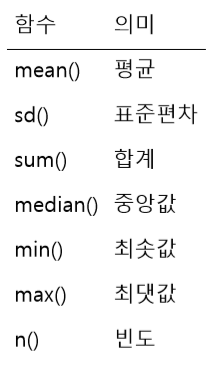

### 각 집단별로 다시 집단 나누기

In [208]:
mpg<-as.data.frame(ggplot2::mpg)
mpg %>% 
    group_by(manufacturer, drv) %>% 
    summarise(mean_cty = mean(cty)) %>% 
    head(10)

manufacturer,drv,mean_cty
audi,4,16.81818
audi,f,18.85714
chevrolet,4,12.50000
chevrolet,f,18.80000
chevrolet,r,14.10000
dodge,4,12.00000
dodge,f,15.81818
ford,4,13.30769
ford,r,14.75000
honda,f,24.44444


### dplyr 조합하기

문제) 회사별로 "suv" 자동차의 도시 및 고속도로 통합 연비 평균을 구해 내림차순으로 정렬하고, 1~5위까지 출력하기

#### 분석절차 생각하기

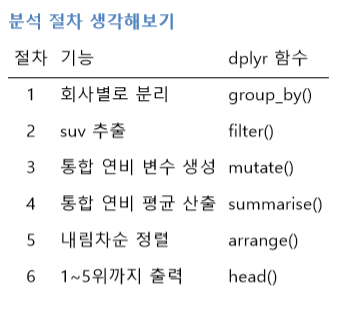

#### dplyr 조합하기

In [221]:
mpg %>% 
    group_by(manufacturer) %>% 
    filter(class == "suv") %>% 
    mutate(total = (cty + hwy)/2) %>%
    summarise(total_mean=mean(total)) %>% 
    arrange(desc(total_mean)) %>% 
    head(5)

manufacturer,total_mean
subaru,21.91667
toyota,16.31250
nissan,15.87500
mercury,15.62500
jeep,15.56250


### 혼자서 해보기

mpg 데이터를 이용해서 분석 문제를 해결해 보세요. 
- Q1. mpg 데이터의 class 는 "suv", "compact" 등 자동차를 특징에 따라 일곱 종류로 분류한 변수입니다. 어떤 차종의 연비가 높은지 비교해보려고 합니다. class 별 cty 평균을 구해보세요. 
- Q2. 앞 문제의 출력 결과는 class 값 알파벳 순으로 정렬되어 있습니다. 어떤 차종의 도시 연비가 높은지 쉽게 알아볼 수 있도록 cty 평균이 높은 순으로 정렬해 출력하세요. 
- Q3. 어떤 회사 자동차의 hwy(고속도로 연비)가 가장 높은지 알아보려고 합니다. hwy 평균이 가장 높은 회사 세 곳을 출력하세요. 
- Q4. 어떤 회사에서 "compact"(경차) 차종을 가장 많이 생산하는지 알아보려고 합니다. 각 회사별 "compact" 차종 수를 내림차순으로 정렬해 출력하세요. 

In [238]:
# Q1
mpg %>% group_by(class) %>% 
    summarise(class_cty = mean(cty))

class,class_cty
2seater,15.40000
compact,20.12766
midsize,18.75610
minivan,15.81818
pickup,13.00000
subcompact,20.37143
suv,13.50000


In [239]:
# Q2
mpg %>% group_by(class) %>% 
    summarise(class_cty = mean(cty)) %>% 
    arrange(desc(class_cty))

class,class_cty
subcompact,20.37143
compact,20.12766
midsize,18.75610
minivan,15.81818
2seater,15.40000
suv,13.50000
pickup,13.00000


In [241]:
mpg %>% group_by(manufacturer) %>% 
    summarise(manufacturer_mean = mean(hwy)) %>% 
    arrange(desc(manufacturer_mean)) %>% 
    head(3)

manufacturer,manufacturer_mean
honda,32.55556
volkswagen,29.22222
hyundai,26.85714


In [249]:
# Q4
mpg %>% filter(class =="compact") %>% 
    group_by(manufacturer) %>% 
    summarise(count=n()) %>% 
    arrange(desc(count))

manufacturer,count
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


## 6-7. 데이터 합치기

### 가로로 합치기

#### 데이터 생성

In [250]:
# 중간고사 데이터 생성
 test1 <- data.frame(id = c(1, 2, 3, 4, 5),
                     midterm = c(60, 80, 70, 90, 85))

In [251]:
# 기말고사 데이터 생성
 test2 <- data.frame(id = c(1, 2, 3, 4, 5),
            final = c(70, 83, 65, 95, 80))

#### id기준으로 합치기
- [주의] by에 변수명을 지정할 때 변수명 앞 뒤에 겹따옴표 입력 

In [254]:
total<-left_join(test1,test2,by="id")
total

id,midterm,final
1,60,70
2,80,83
3,70,65
4,90,95
5,85,80


### 다른 데이터 활용해 변수 추가하기

#### 반별 담임교사 명단 생성

In [257]:
name<-data.frame(class = c(1, 2, 3, 4, 5),
                 teacher = c("kim", "lee", "park", "choi", "jung"))
name

class,teacher
1,kim
2,lee
3,park
4,choi
5,jung


#### class 기준 합치기

In [259]:
exam_new<-left_join(exam,name, by="class")
exam_new

id,class,math,english,science,teacher
1,1,50,98,50,kim
2,1,60,97,60,kim
3,1,55,86,78,kim
4,1,30,98,58,kim
5,2,25,80,65,lee
6,2,50,89,98,lee
7,2,80,90,45,lee
8,2,55,78,25,lee
9,3,20,98,15,park
10,3,50,98,45,park


### 세로로 합치기

#### 데이터 생성

In [262]:
# 학생 1~5 번 시험 데이터 생성
 group_a <- data.frame(id = c(1, 2, 3, 4, 5),
                       test = c(60, 80, 70, 90, 85)) 
 
# 학생 6~10 번 시험 데이터 생성
 group_b <- data.frame(id = c(6, 7, 8, 9, 10),
                       test = c(70, 83, 65, 95, 80))

#### 세로로 합치기

In [267]:
group_all<-bind_rows(group_a,group_b)
group_all

id,test
1,60
2,80
3,70
4,90
5,85
6,70
7,83
8,65
9,95
10,80


### 혼자서 해보기

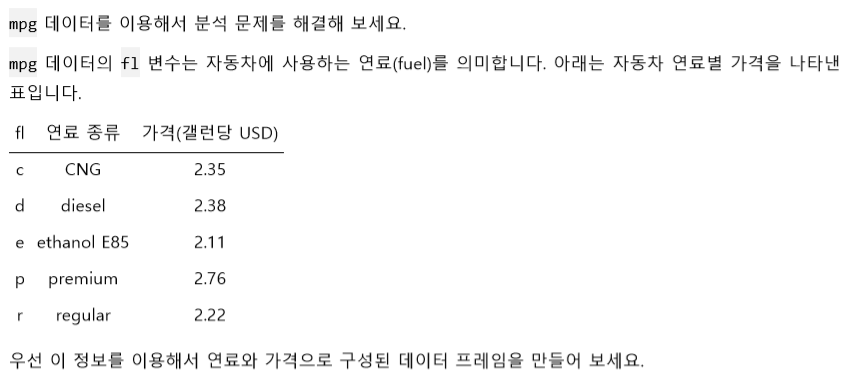

In [268]:
fuel<-data.frame(fl = c("c", "d", "e", "p", "r"),
                 price_fl = c(2.35, 2.38, 2.11, 2.76, 2.22),
                 stringsAsFactors = F)
fuel

fl,price_fl
c,2.35
d,2.38
e,2.11
p,2.76
r,2.22


- Q1. mpg 데이터에는 연료 종류를 나타낸 fl 변수는 있지만 연료 가격을 나타낸 변수는 없습니다. 위에서 만든 fuel 데이터를 이용해서 mpg 데이터에 price_fl(연료 가격) 변수를 추가하세요. 
- Q2. 연료 가격 변수가 잘 추가됐는지 확인하기 위해서 model, fl, price_fl 변수를 추출해 앞부분 5 행을 출력해 보세요. 

In [275]:
# Q1
mpg<-as.data.frame(ggplot2::mpg)
mpg<-left_join(mpg,fuel,by="fl")
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,2.76


In [276]:
# Q2
mpg %>% select(model, fl, price_fl) %>% 
    head(5)

model,fl,price_fl
a4,p,2.76
a4,p,2.76
a4,p,2.76
a4,p,2.76
a4,p,2.76


### 정리하기

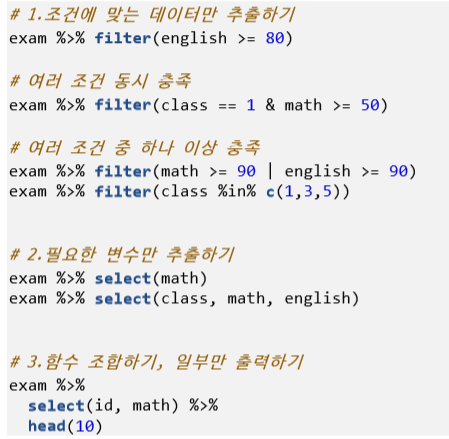

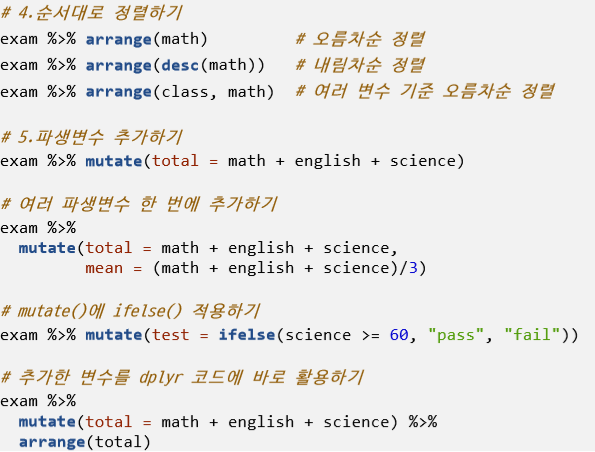

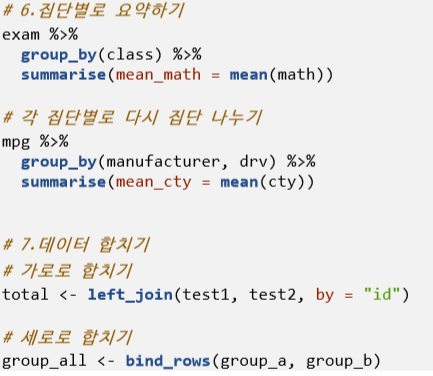

### 분석 도전

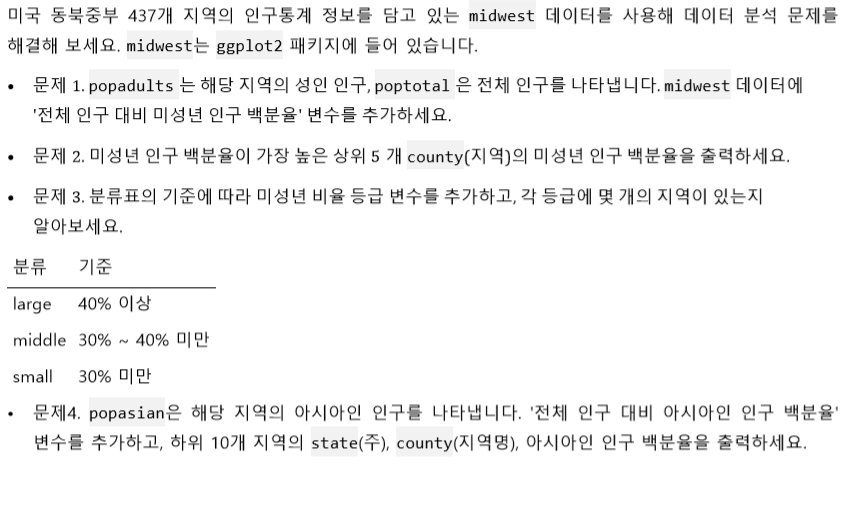

In [279]:
# Q1
midwest<-as.data.frame(ggplot2::midwest)
midwest<-midwest %>% mutate(popkid= (poptotal - popadults)/poptotal*100 )
head(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,popkid
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,...,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR,34.48631
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,...,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR,36.72125
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,...,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR,35.50130
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,...,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU,37.44076
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,...,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR,31.81974
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,...,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR,34.30845


In [281]:
# Q2
midwest %>% select(county,popkid) %>% 
    arrange(desc(popkid)) %>% 
    head(5)

county,popkid
ISABELLA,51.50117
MENOMINEE,50.59126
ATHENS,49.32073
MECOSTA,49.05918
MONROE,47.35818


In [290]:
# Q3
midwest<-midwest %>% mutate(popkid_rank=ifelse(popkid>=40,"large",
                                      ifelse(popkid>=30,"middle","small")))
head(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,popkid,popkid_rank
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,...,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR,34.48631,middle
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,...,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR,36.72125,middle
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,...,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR,35.50130,middle
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,...,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU,37.44076,middle
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,...,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR,31.81974,middle
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,...,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR,34.30845,middle


In [291]:
table(midwest$popkid_rank)


 large middle  small 
    32    396      9 

In [304]:
# Q4
midwest<-midwest %>% mutate(asian_percen=(popasian/poptotal)*100) %>% 
    arrange(asian_percen) %>% 
    head(10) %>% 
    select(state,county,asian_percen)
midwest

state,county,asian_percen
WI,MENOMINEE,0.00000000
IN,BENTON,0.01059210
IN,CARROLL,0.01594981
OH,VINTON,0.02703190
WI,IRON,0.03250447
IL,SCOTT,0.05315379
IN,CLAY,0.06071645
MI,OSCODA,0.06375925
OH,PERRY,0.06654625
IL,PIATT,0.07074865


# 7. 데이터 정제 
- 빠진 데이터, 이상한 데이터 제거하기

## 7-1. 빠진 데이터를 찾아라! - 결측치 정제하기


결측치(Missing Value) 
- 누락된 값, 비어있는 값 
- 함수 적용 불가, 분석 결과 왜곡 
- 제거 후 분석 실시

### 결측치 찾기

#### 결측치 만들기

In [5]:
# 결측치 표기 - 대문자 NA
df <- data.frame(sex = c("M", "F", NA, "M", "F"),
                 score = c(5, 4, 3, 4, NA))
df
# [유의] NA 앞 뒤에 겹따옴표 없음 

sex,score
M,5
F,4
NA,3
M,4
F,NA


#### 결측치 확인하기 

In [6]:
is.na(df)

sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE


In [7]:
table(is.na(df))  # 결측치 빈도 출력


FALSE  TRUE 
    8     2 

#### 변수별로 결측치 확인하기

In [11]:
table(is.na(df$sex))


FALSE  TRUE 
    4     1 

In [12]:
table(is.na(df$score))


FALSE  TRUE 
    4     1 

#### 결측치 포함된 상태로 분석 -> 값이 나오지 않는다

In [151]:
mean(df$score)  # 평균 산출

[1] NA

In [152]:
sum(df$score)   # 합계 산출

[1] NA

### 결측치 제거하기 

#### 결측치 있는 행 제거하기

In [14]:
library(dplyr)
df %>% filter(is.na(score)) # score 가 NA 인 데이터만 출력

sex,score
F,NA


In [156]:
df %>% filter(!is.na(score))  # score 결측치 제거

sex,score
M,5
F,4
NA,3
M,4


#### 결측치 제외한 데이터로 분석하기 

In [158]:
df_nomiss <- df %>% filter(!is.na(score))  # score 결측치 제거
 mean(df_nomiss$score)                      # score 평균 산출

[1] 4

In [159]:
sum(df_nomiss$score)                       # score 합계 산출

[1] 16

#### 여러 변수 동시에 결측치 없는 데이터 추출하기

In [162]:
# score, sex 결측치 제외
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex))
df_nomiss 

sex,score
M,5
F,4
M,4


#### 결측치가 하나라도 있으면 제거하기 

- 분석에 필요한 데이터까지 손실 될 가능성 유의 
- ex) 성별-소득 관계 분석하는데 지역 결측치까지 제거 

In [164]:
df_nomiss2 <- na.omit(df)  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2                 # 출력 

,sex,score
1,M,5
2,F,4
4,M,4


### 함수의 결측치 제외 기능 이용하기 - na.rm = T 

In [166]:
mean(df$score, na.rm = T)  # 결측치 제외하고 평균 산출

[1] 4

In [167]:
sum(df$score, na.rm = T)   # 결측치 제외하고 합계 산출

[1] 16

#### summarise()에서 na.rm = T사용하기

In [173]:
# 결측치 생성 
exam <- read.csv("./Rdata/csv_exam.csv")            # 데이터 불러오기
exam[c(3, 8, 15), "math"] <- NA             # 3, 8, 15 행의 math 에 NA 할당


In [174]:
# 평균 구하기 
exam %>% summarise(mean_math = mean(math))             # 평균 산출

mean_math
NA


In [175]:
exam %>% summarise(mean_math = mean(math, na.rm = T))  # 결측치 제외하고 평균 산출

mean_math
55.23529


#### 다른 함수들에 적용

In [177]:
exam %>% summarise(mean_math = mean(math, na.rm = T),      # 평균 산출
                    sum_math = sum(math, na.rm = T),        # 합계 산출
                    median_math = median(math, na.rm = T))  # 중앙값 산출

mean_math,sum_math,median_math
55.23529,939,50


### 결측치 대체하기
- 결측치 많을 경우 모두 제외하면 데이터 손실 큼 
- 대안: 다른 값 채워넣기
- 결측치 대체법(Imputation) 
    - 대표값(평균, 최빈값 등)으로 일괄 대체 
    - 통계분석 기법 적용, 예측값 추정해서 대체
    

### 평균값으로 결측치 대체하기

#### 평균 구하기

In [179]:
mean(exam$math, na.rm = T)  # 결측치 제외하고 math 평균 산출

[1] 55.23529

#### 평균으로 대체하기

In [180]:
exam$math <- ifelse(is.na(exam$math), 55, exam$math)  # math 가 NA 면 55 로 대체
table(is.na(exam$math))                               # 결측치 빈도표 생성


FALSE 
   20 

In [181]:
exam  # 출력

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,55,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,55,78,25
9,3,20,98,15
10,3,50,98,45


In [182]:
mean(exam$math)  # math 평균 산출

[1] 55.2

### 혼자서 해보기
mpg 데이터를 이용해서 분석 문제를 해결해 보세요. 
mpg 데이터 원본에는결측치가 없습니다. 
우선 mpg 데이터를 불러와 몇 개의 값을 결측치로 만들겠습니다. 
아래 코드를 실행하면 다섯 행의 hwy 변수에 NA가 할당됩니다.

In [21]:
mpg <- as.data.frame(ggplot2::mpg)           # mpg 데이터 불러오기
mpg[c(65, 124, 131, 153, 212), "hwy"] <- NA  # NA 할당하기

결측치가 들어있는 mpg 데이터를 활용해서 문제를 해결해보세요. 
- Q1. drv(구동방식)별로 hwy(고속도로 연비) 평균이 어떻게 다른지 알아보려고 합니다. 분석을 하기 전에 우선 두 변수에 결측치가 있는지 확인해야 합니다. drv 변수와 hwy 변수에 결측치가 몇 개 있는지 알아보세요. 
- Q2. filter()를 이용해 hwy 변수의 결측치를 제외하고, 어떤 구동방식의 hwy 평균이 높은지 알아보세요. 하나의 dplyr 구문으로 만들어야 합니다.

In [23]:
# Q1
table(is.na(mpg$drv))
table(is.na(mpg$hwy))


FALSE 
  234 


FALSE  TRUE 
  229     5 

In [32]:
# Q2
mpg %>% filter(!is.na(hwy)) %>% group_by(drv) %>% summarise(mean_drv=mean(hwy))

drv,mean_drv
4,19.24242
f,28.20000
r,21.00000


## 7-2. 이상한 데이터를 찾아라! - 이상치 정제하기 
이상치(Outlier) - 정상범주에서 크게 벗어난 값 
- 이상치 포함시 분석 결과 왜곡 
- 결측 처리 후 제외하고 분석 

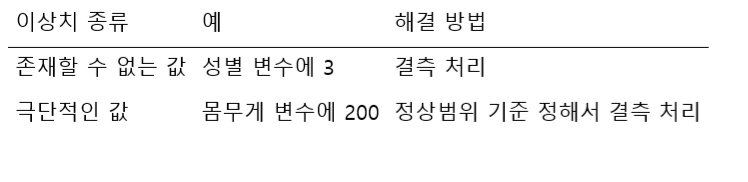

### 이상치 제거하기 - 1. 존재할 수 없는 값
- 논리적으로 존재할 수 없으므로 바로 결측 처리 후 분석시 제외 

#### 이상치 포함된 데이터 생성 - sex 3, score 6

In [33]:
outlier<-data.frame(sex = c(1, 2, 1, 3, 2, 1),
                    score = c(5, 4, 3, 4, 2, 6))
outlier

sex,score
1,5
2,4
1,3
3,4
2,2
1,6


#### 이상치 확인하기

In [34]:
table(outlier$sex)


1 2 3 
3 2 1 

In [35]:
table(outlier$score)


2 3 4 5 6 
1 1 2 1 1 

#### 결측 처리하기

In [38]:
# sex 가 3 이면 NA 할당
outlier$sex<-ifelse(outlier$sex == 3, NA, outlier$sex)
outlier

sex,score
1,5
2,4
1,3
NA,4
2,2
1,6


#### 결측 처리하기 - score

In [40]:
# sex 가 1~5 아니면 NA 할당
outlier$score<-ifelse(outlier$score > 5, NA,outlier$score )
outlier

sex,score
1,5
2,4
1,3
NA,4
2,2
1,NA


#### 결측치 제외하고 분석 

In [43]:
outlier %>% 
    filter(!is.na(sex),!is.na(score)) %>%
    group_by(sex) %>%
    summarise(mean_score=mean(score))

sex,mean_score
1,4
2,3


### 이상치 제거하기 - 2. 극단적인 값 
- 정상범위 기준 정해서 벗어나면 결측 처리 

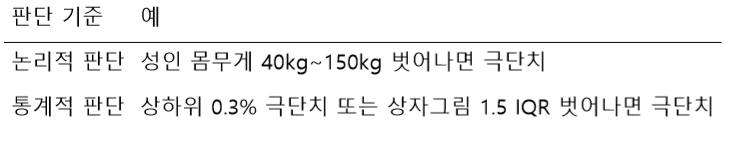

### 상자그림으로 극단치 기준 정해서 제거하기 

#### 상자그림 생성

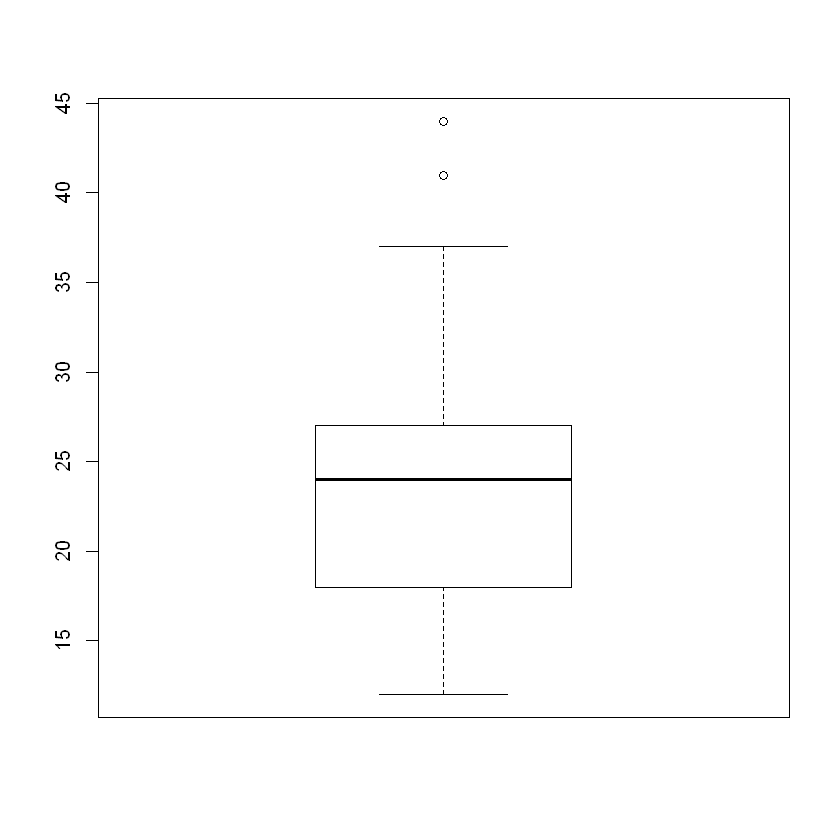

In [45]:
mpg<-as.data.frame(ggplot2::mpg)
boxplot(mpg$hwy)

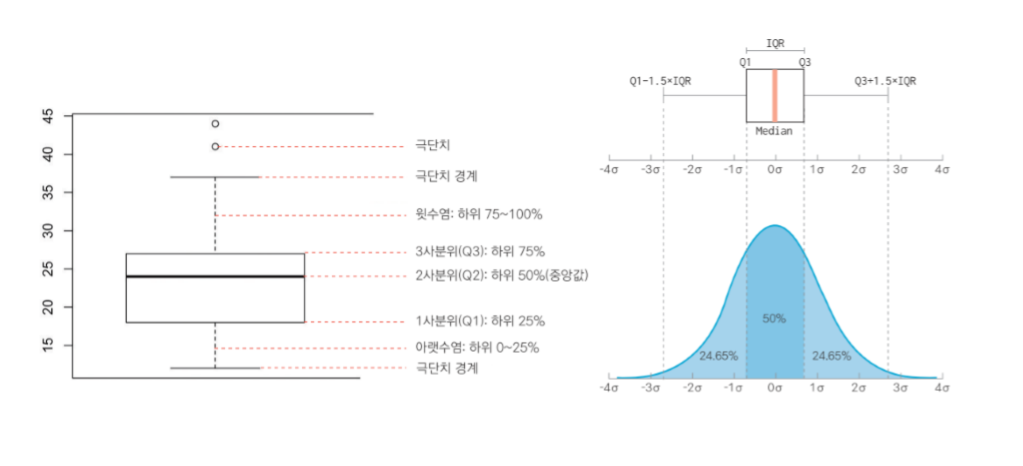

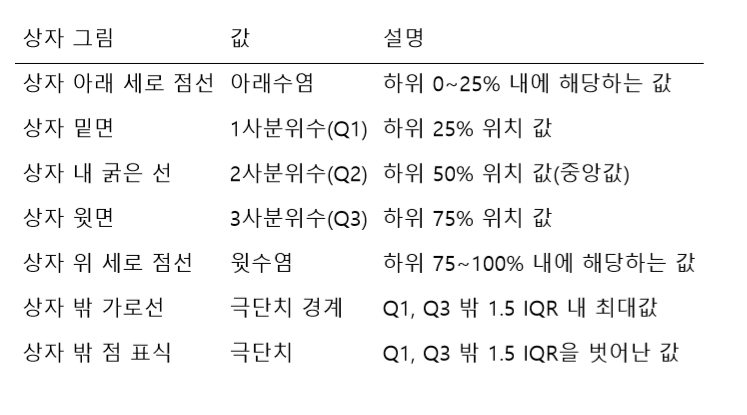

#### 상자그림 통계치 출력

[,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

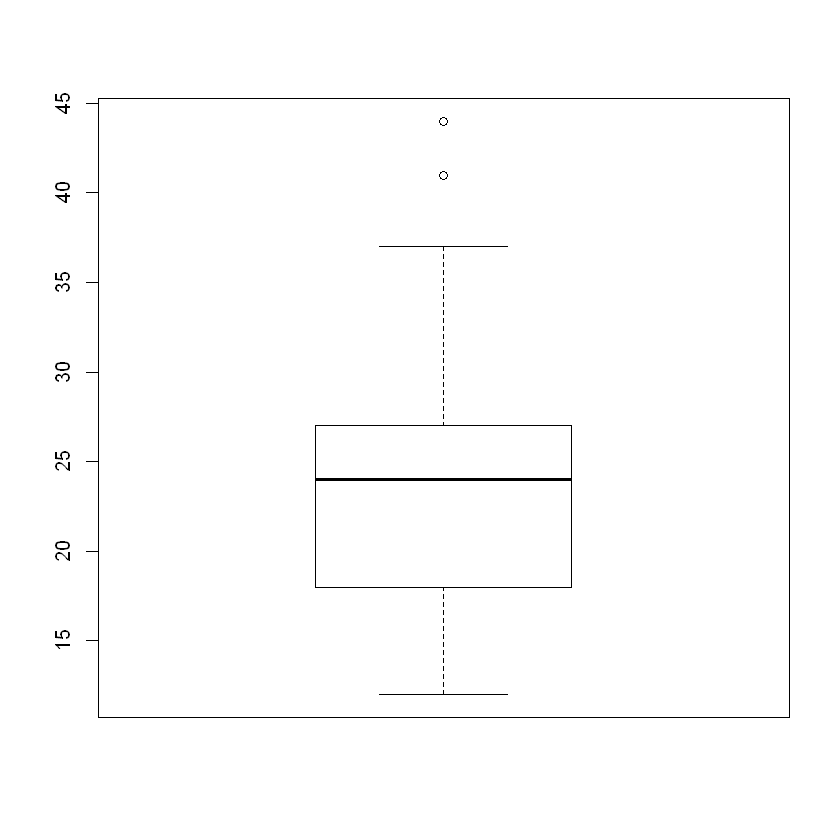

In [46]:
boxplot(mpg$hwy)$stats  # 상자그림 통계치 출력

#### 결측 처리하기

In [4]:
# 12~37 벗어나면 NA 할당
mpg<-as.data.frame(ggplot2::mpg)
mpg$hwy<-ifelse(mpg$hwy < 12  | mpg$hwy > 37, NA, mpg$hwy )
table(is.na(mpg$hwy))


FALSE  TRUE 
  231     3 

#### 결측치 제외하고 분석하기 

In [8]:
library(dplyr)
mpg %>% 
    group_by(drv) %>% 
    summarise(mean_hwy=mean(hwy,na.rm=T))

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



drv,mean_hwy
4,19.17476
f,27.72816
r,21.00000


### 혼자서 해보기 
mpg 데이터를 이용해서 분석 문제를 해결해 보세요. 
우선 mpg 데이터를 불러와서 일부러 이상치를 만들겠습니다. drv(구동방식) 변수의 값은 4(사륜구동), f(전륜구동), r(후륜구동) 세 종류로 되어있습니다. 몇 개의 행에 존재할 수 없는 값 k를 할당하겠습니다. cty(도시 연비) 변수도 몇 개의 행에 극단적으로 크거나 작은 값을 할당하겠습니다. 

In [23]:
mpg <- as.data.frame(ggplot2::mpg)                  # mpg 데이터 불러오기
mpg[c(10, 14, 58, 93), "drv"] <- "k"                # drv 이상치 할당
mpg[c(29, 43, 129, 203), "cty"] <- c(3, 4, 39, 42)  # cty 이상치 할당 

이상치가 들어있는 mpg 데이터를 활용해서 문제를 해결해보세요. 
구동방식별로 도시 연비가 다른지 알아보려고 합니다. 분석을 하려면 우선 두 변수에 이상치가 있는지 확인하려고 합니다. 
- Q1. drv 에 이상치가 있는지 확인하세요. 이상치를 결측 처리한 다음 이상치가 사라졌는지 확인하세요. 결측 처리 할 때는 %in% 기호를 활용하세요. 
- Q2. 상자 그림을 이용해서 cty 에 이상치가 있는지 확인하세요. 상자 그림의 통계치를 이용해 정상 범위를 벗어난 값을 결측 처리한 후 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하세요. 
- Q3. 두 변수의 이상치를 결측처리 했으니 이제 분석할 차례입니다. 이상치를 제외한 다음 drv 별로 cty 평균이 어떻게 다른지 알아보세요. 하나의 dplyr 구문으로 만들어야 합니다.

In [24]:
#Q1
table(mpg$drv)


  4   f   k   r 
100 106   4  24 

In [25]:
mpg$drv<-ifelse(mpg$drv %in% c("4","f","r"), mpg$drv, NA)

In [26]:
table(mpg$drv)


  4   f   r 
100 106  24 

9
14
17
19
26


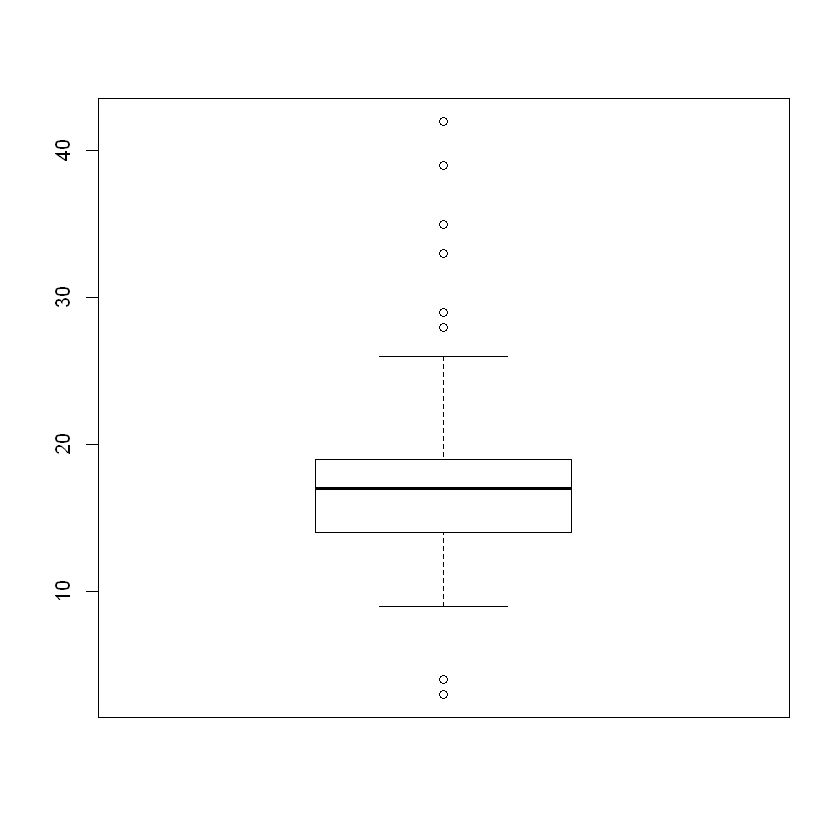

In [30]:
# Q2
boxplot(mpg$cty)$stats

In [31]:
mpg$cty<-ifelse(mpg$cty<9|mpg$cty>26,NA,mpg$cty)

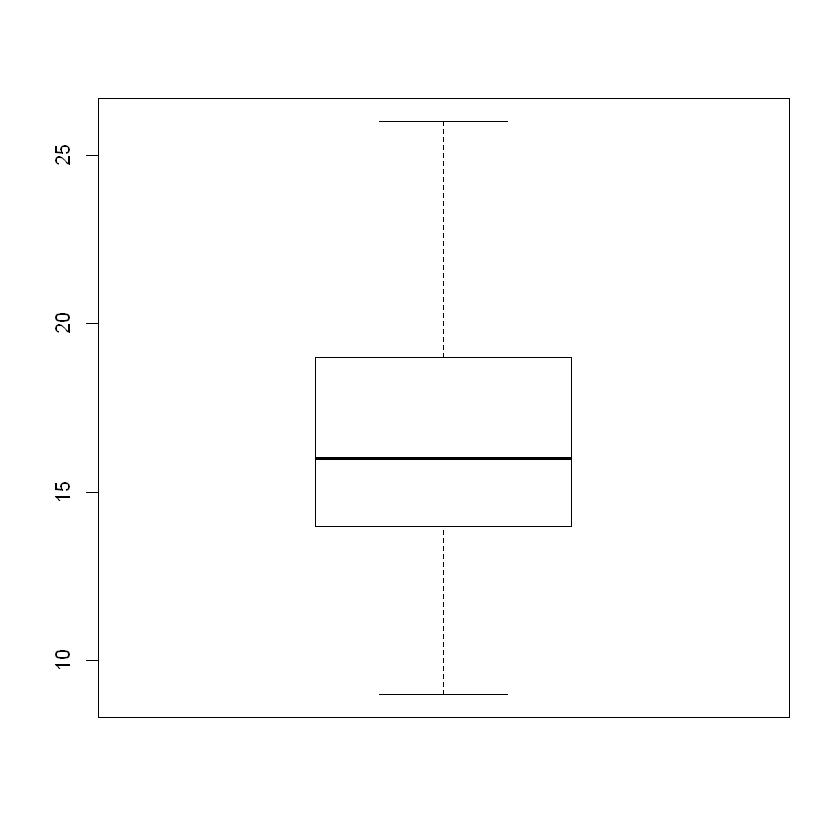

In [33]:
boxplot(mpg$cty)

In [38]:
# Q3
mpg %>% 
    filter(!is.na(drv) & !is.na(cty))%>%
    group_by(drv) %>% 
    summarise(mean_cty=mean(mpg$cty))

drv,mean_cty
4,NA
f,NA
r,NA


###### 궁금해여 
mpg$drv 사용할 때와 그냥 drv를 사용할 때 구분하는 법

# 8. 그래프 만들기 

## 8-1. R로 만들 수 있는 그래프 살펴보기 
- 2차원 그래프, 3차원 그래프 
- 지도 그래프 
- 네트워크 그래프 
- 모션 차트 
- 인터랙티브 그래프 

## 8-2. 산점도 - 변수 간 관계 표현하기

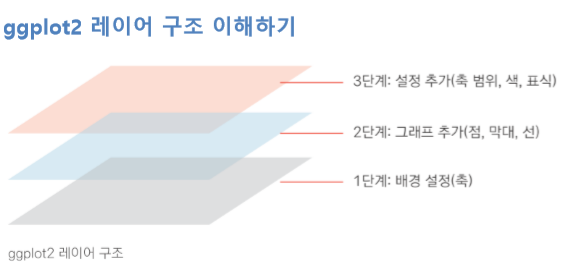

### 산점도 만들기
- 산점도(Scater Plot) : 데이터를 x축과 y축에 점으로 표현한 그래프 
- 나이와 소득처럼, 연속 값으로 된 두 변수의 관계를 표현할 때 사용

In [41]:
# ggplot2 로드
library(ggplot2)

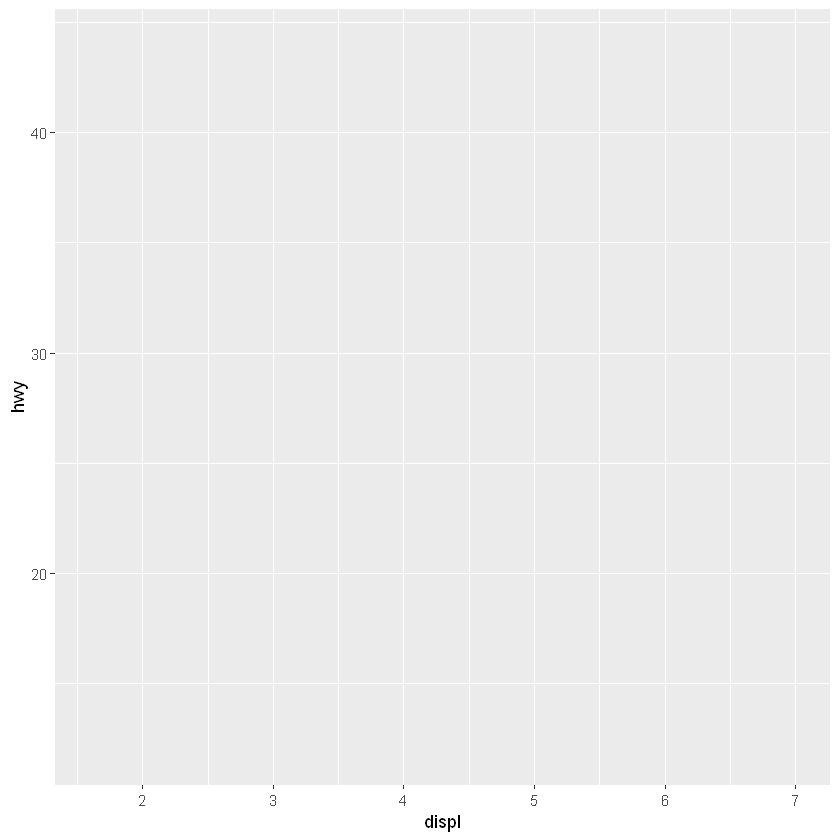

In [45]:
# 1.배경설정
# x 축 displ, y 축 hwy 로 지정해 배경 생성 -> aes가 없으면 표가 나타나지 않는다
ggplot(data=mpg,aes(x=displ,y=hwy))

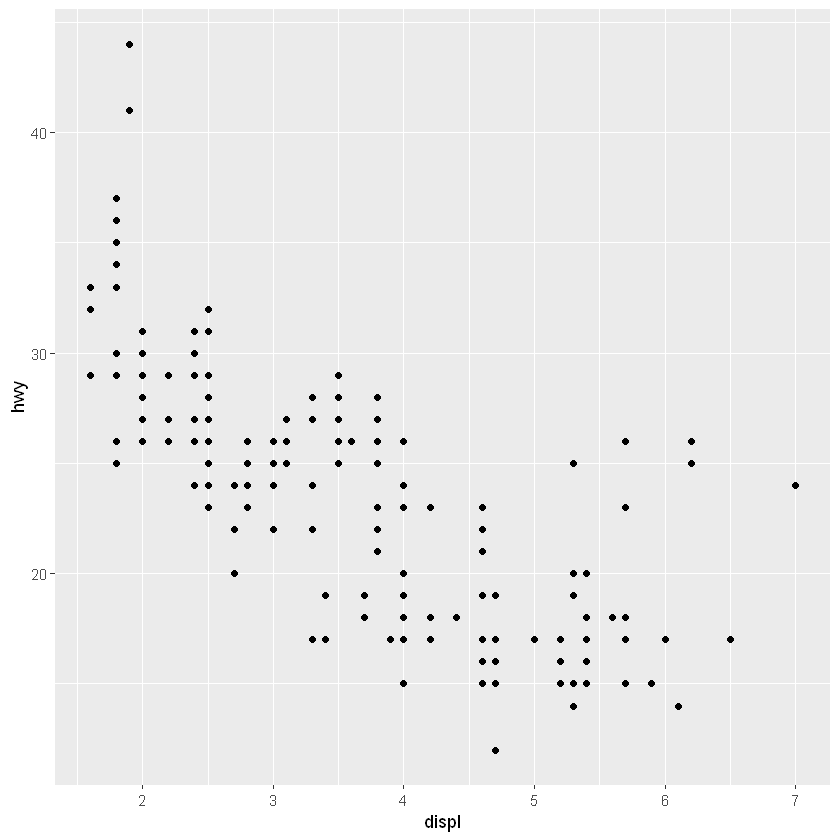

In [47]:
# 2. 그래프 추가하기
# 배경에 산점도 추가
ggplot(data=mpg,aes(x=displ,y=hwy)) + geom_point()

Warning message:
"Removed 105 rows containing missing values (geom_point)."

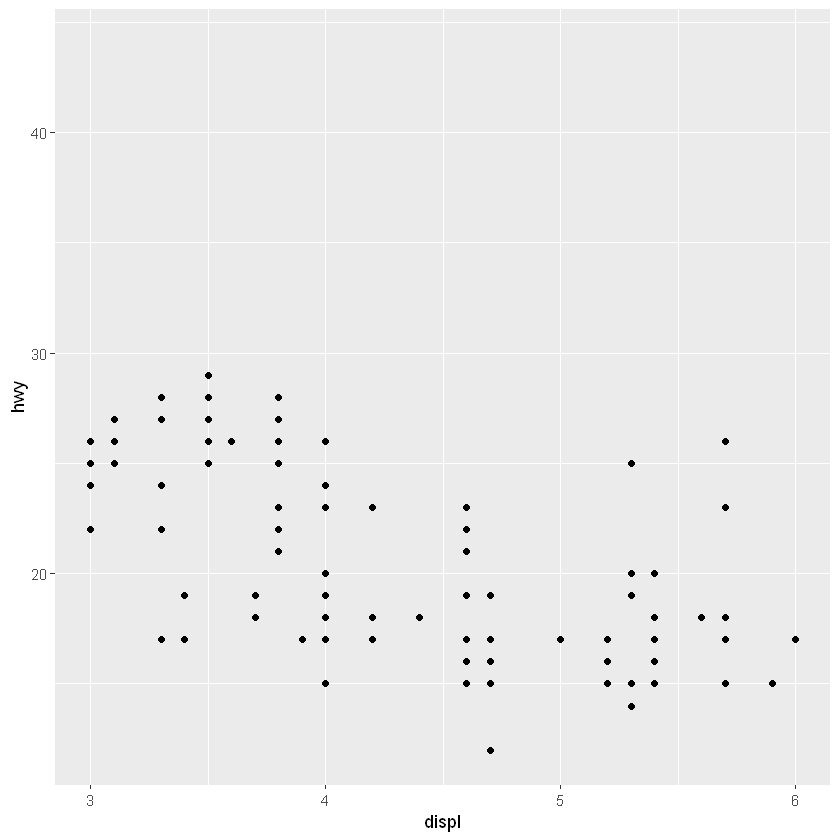

In [48]:
# 3. 축 범위를 조정하는 설정 추가하기
# x 축 범위 3~6 으로 지정
ggplot(data=mpg,aes(x=displ,y=hwy))+geom_point()+xlim(3,6)

Warning message:
"Removed 105 rows containing missing values (geom_point)."

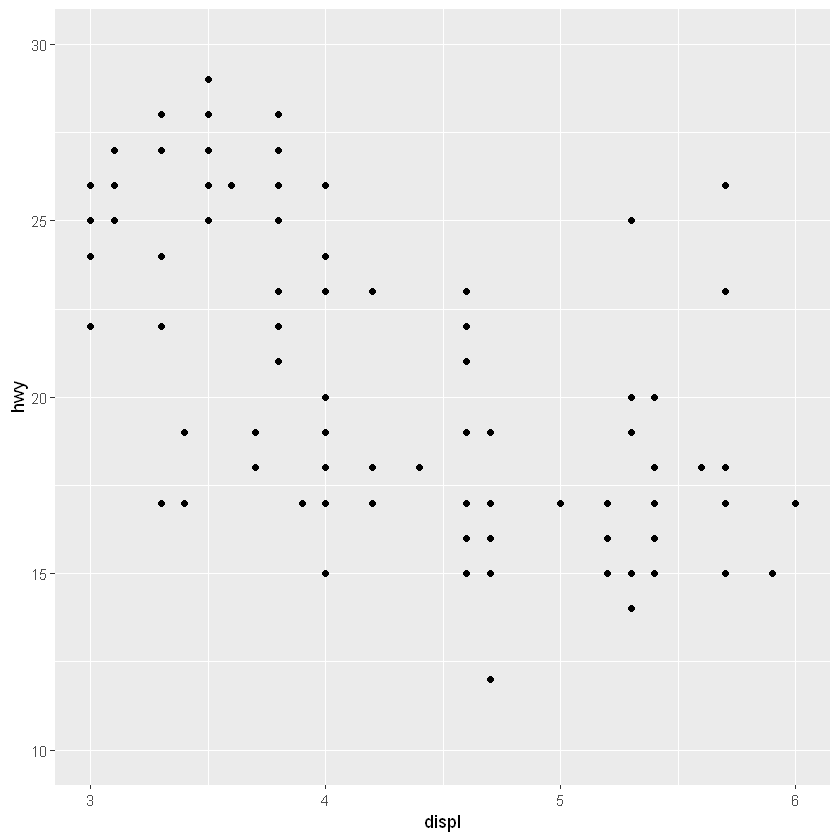

In [49]:
# 3. 축 범위를 조정하는 설정 추가하기
# x 축 범위 3~6, y 축 범위 10~30 으로 지정
ggplot(data=mpg,aes(x=displ,y=hwy))+geom_point()+xlim(3,6)+ylim(10,30)

### ggplot 함수 구조

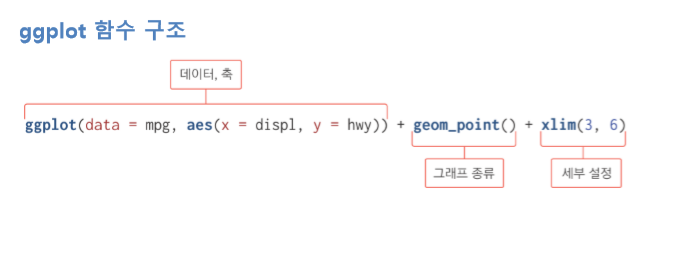

### ggplot2 코드 가독성 높이기 

Warning message:
"Removed 105 rows containing missing values (geom_point)."

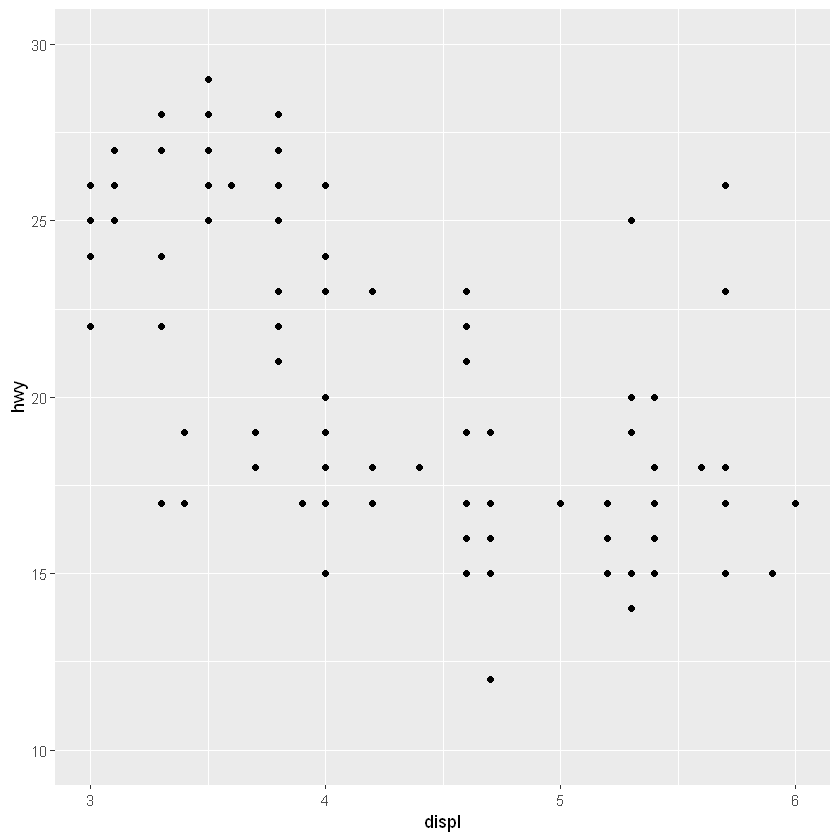

In [50]:
#한 줄로 작성 
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3, 6) + ylim(10, 30) 

In [ ]:
#+ 뒤에서 줄 바꾸기 
ggplot(data = mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    xlim(3, 6) +
    ylim(10, 30) 

### ggplot() vs qplot() 
- qplot() : 전처리 단계 데이터 확인용 문법 간단, 기능 단순 
- ggplot() : 최종 보고용. 색, 크기, 폰트 등 세부 조작 가능 

### 혼자서 해보기 
mpg 데이터와 midwest 데이터를 이용해서 분석 문제를 해결해 보세요. 
- Q1. mpg 데이터의 cty(도시 연비)와 hwy(고속도로 연비) 간에 어떤 관계가 있는지 알아보려고 합니다. x 축은 cty, y 축은 hwy 로 된 산점도를 만들어 보세요. 
- Q2. 미국 지역별 인구통계 정보를 담은 ggplot2 패키지의 midwest 데이터를 이용해서 전체 인구와 아시아인 인구 간에 어떤 관계가 있는지 알아보려고 합니다. x 축은 poptotal(전체 인구), y 축은 popasian(아시아인 인구)으로 된 산점도를 만들어 보세요. 전체 인구는 50 만 명 이하, 아시아인 인구는 1 만 명 이하인 지역만 산점도에 표시되게 설정하세요.

In [51]:
mpg<-as.data.frame(ggplot2::mpg)

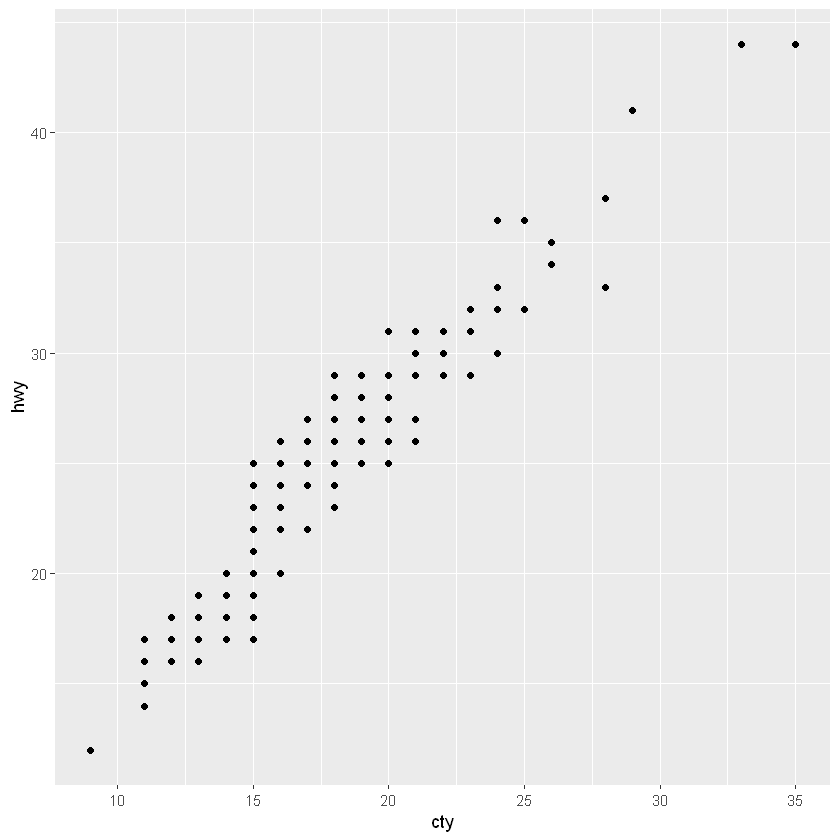

In [52]:
# Q1
ggplot(data=mpg,aes(x=cty,y=hwy)) + geom_point()

In [54]:
# Q2
midwest<-as.data.frame(ggplot2::midwest)

Warning message:
"Removed 15 rows containing missing values (geom_point)."

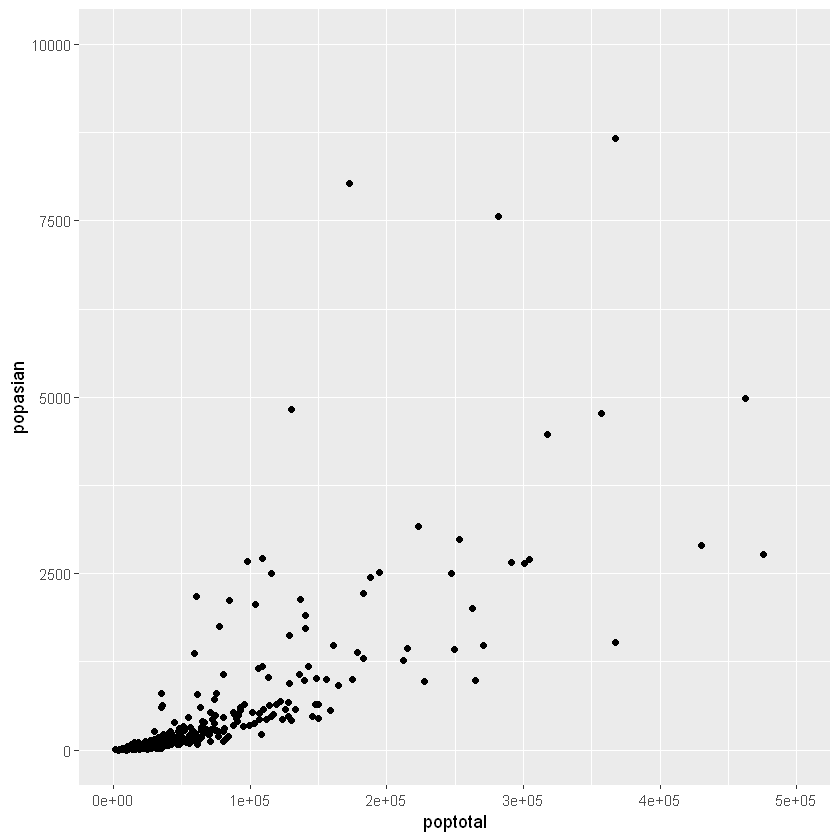

In [57]:
ggplot(data=midwest,aes(x=poptotal,y=popasian))+
    geom_point()+
    xlim(0,500000)+
    ylim(0,10000)

### 참고 
- 10만 단위가 넘는 숫자는 지수 표기법(Exponential Notation)에 따라 표현됨 
- 1e+05 = 10만(1 × 10의 5승) 
- 정수로 표현하기 : options(scipen = 99) 실행 후 그래프 생성 
- 지수로 표현하기 : options(scipen = 0) 실행 후 그래프 생성 
- R 스튜디오 재실행시 옵션 원상 복구됨 